<a href="https://colab.research.google.com/github/DevEnriquegd/optimizacion_aeroportuaria/blob/main/optimizacion_aeroportuaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/DevEnriquegd/optimizacion_aeroportuaria/refs/heads/main/flights.csv'

data = pd.read_csv(url)

data.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
21616,6,YE,Boeing 787,schengen,AUZ,17.033688,19.033688,346,2013,False,27.846313
38496,14,BZ,Airbus A330,schengen,ZQO,7.708301,11.708301,11,2017,False,-9.474688
16516,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,6,2013,False,50.084366
16681,21,BZ,Boeing 737,schengen,FJB,7.065594,10.065594,17,2013,False,4.862863
32063,11,BZ,Airbus A320,non-schengen,EMM,10.177197,13.177197,312,2015,False,-2.654076


In [3]:
data.shape

(71175, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [5]:
data.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [6]:
data.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


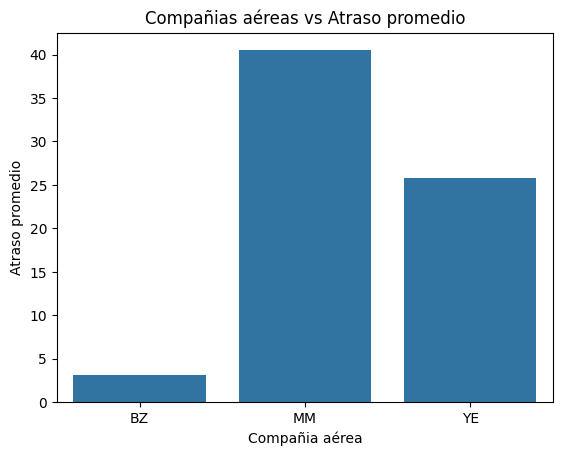

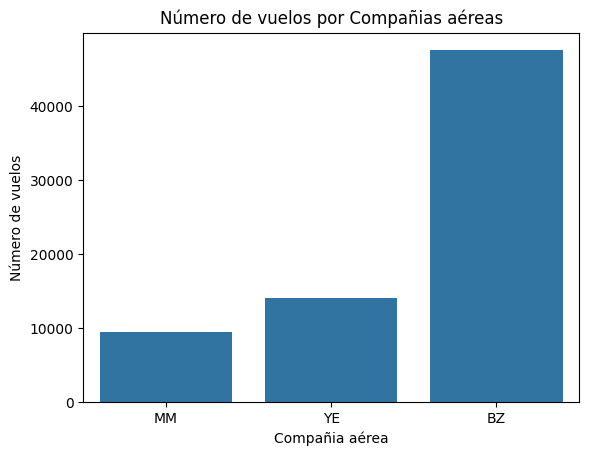

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_delay = data.groupby('airline')['delay'].mean().reset_index()
sns.barplot(
    data=avg_delay,
    x='airline',
    y='delay'
)
plt.title('Compañias aéreas vs Atraso promedio')
plt.xlabel('Compañia aérea')
plt.ylabel('Atraso promedio')
plt.show()


sns.countplot(
    data=data,
    x='airline'
)
plt.title('Número de vuelos por Compañias aéreas')
plt.xlabel('Compañia aérea')
plt.ylabel('Número de vuelos')
plt.show()

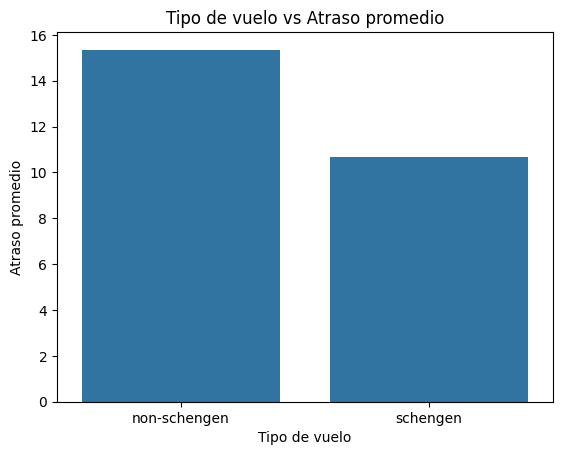

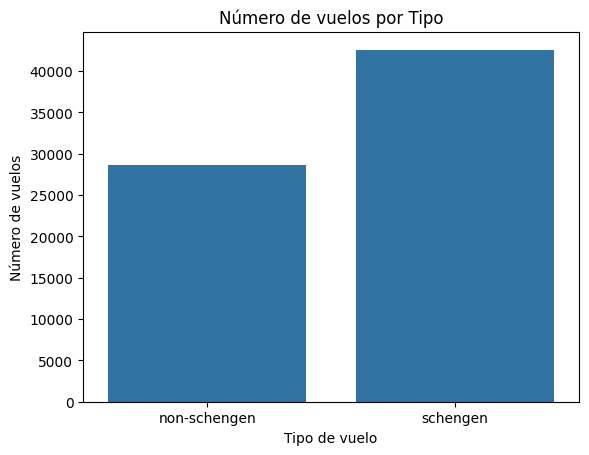

In [8]:
avg_delay = data.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(
    data=avg_delay,
    x='schengen',
    y='delay'
)
plt.title('Tipo de vuelo vs Atraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Atraso promedio')
plt.show()


sns.countplot(
    data=data,
    x='schengen'
)
plt.title('Número de vuelos por Tipo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Número de vuelos')
plt.show()

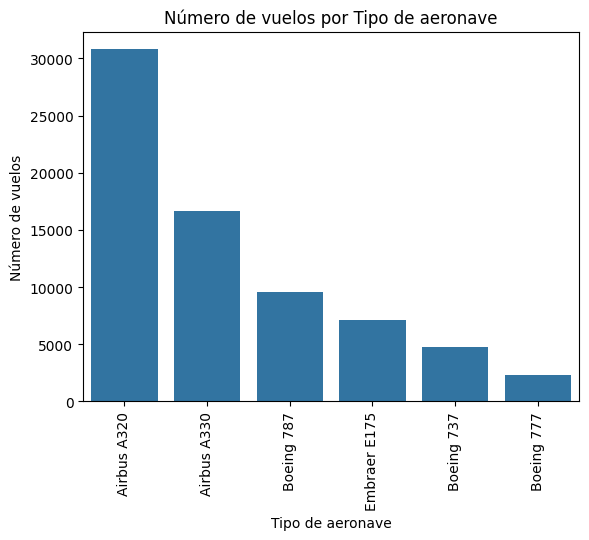

In [9]:
order = data['aircraft_type'].value_counts().index

sns.countplot(
    data=data,
    order=order,
    x='aircraft_type'
)
plt.title('Número de vuelos por Tipo de aeronave')
plt.xticks(rotation=90)
plt.xlabel('Tipo de aeronave')
plt.ylabel('Número de vuelos')
plt.show()

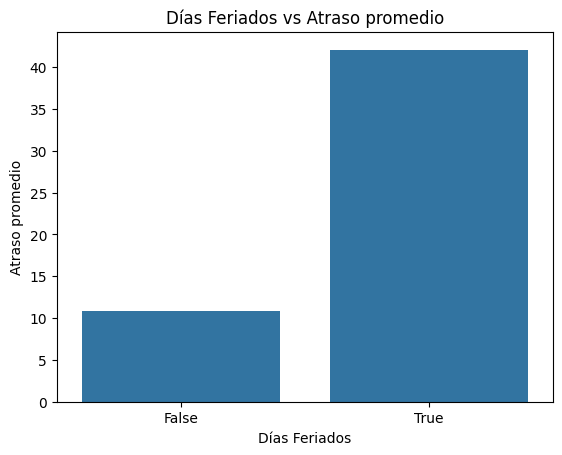

In [10]:
avg_delay = data.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(
    data=avg_delay,
    x='is_holiday',
    y='delay'
)
plt.title('Días Feriados vs Atraso promedio')
plt.xlabel('Días Feriados')
plt.ylabel('Atraso promedio')
plt.show()

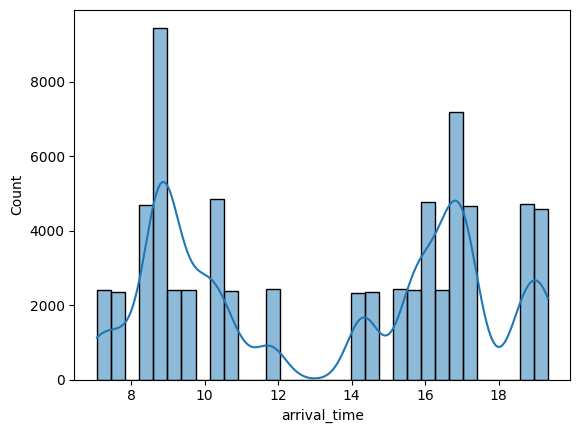

In [11]:
sns.histplot(
    data=data,
    x='arrival_time',
    kde=True
);

In [12]:
import numpy as np

def ancho_bin(df,columna):
  q75,q25 = np.percentile(df[columna],[75,25])
  iqr = q75-q25
  ancho = 2 * iqr * np.power(len(df[columna]), -1/3)
  return ancho

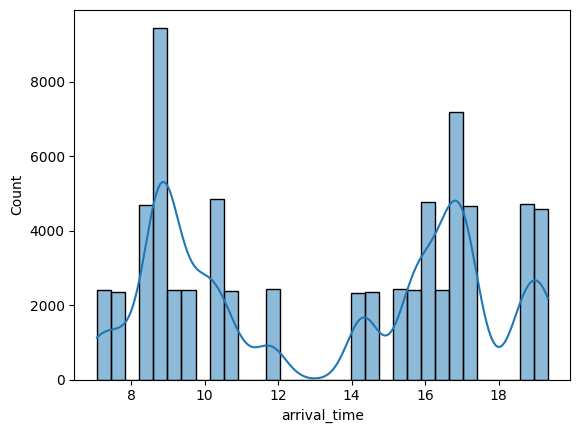

In [13]:
binwidth = ancho_bin(data, 'arrival_time')

sns.histplot(
    data=data,
    binwidth=binwidth,
    x='arrival_time',
    kde=True
);

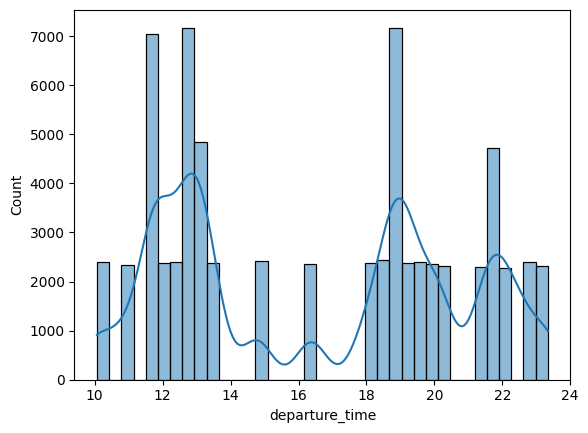

In [14]:
binwidth = ancho_bin(data, 'departure_time')

sns.histplot(
    data=data,
    binwidth=binwidth,
    x='departure_time',
    kde=True
);

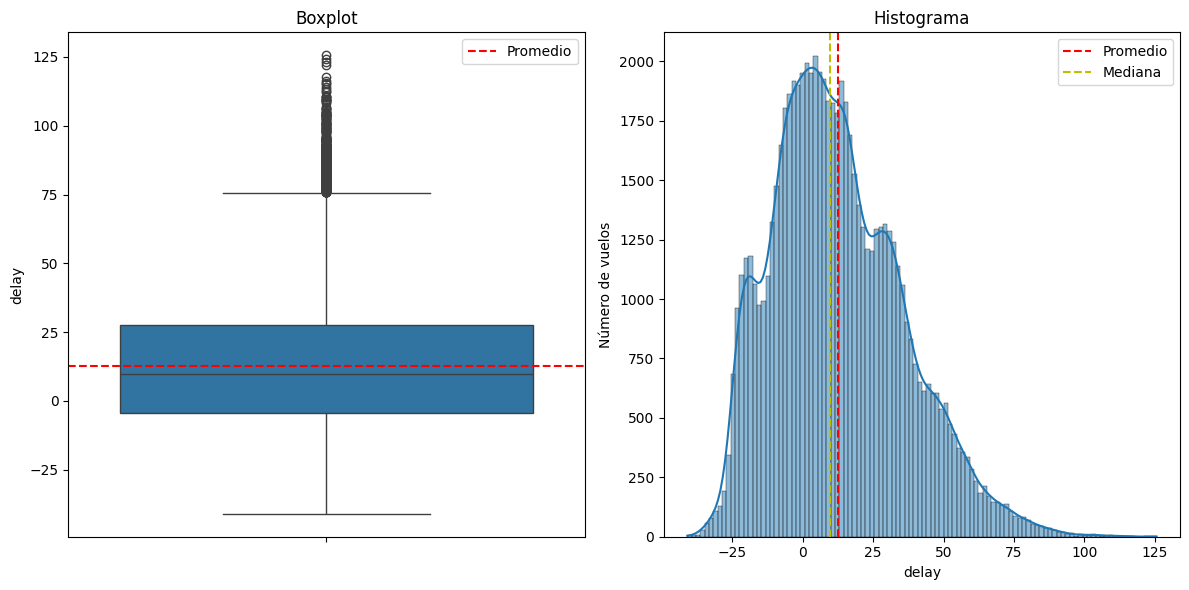

In [15]:
avg_delay = data['delay'].mean()
med_delay = data['delay'].median()

fig, ax = plt.subplots(1,2,figsize=(12,6))
sns.boxplot(
    data=data,
    y='delay',
    ax=ax[0]
)
ax[0].set_title('Boxplot')
ax[0].axhline(y=avg_delay, color='r', linestyle='--', label='Promedio')
ax[0].legend()

binwidth = ancho_bin(data, 'delay')

sns.histplot(
    data=data,
    x='delay',
    ax=ax[1],
    kde=True,
    binwidth=binwidth
)
plt.ylabel('Número de vuelos')
plt.grid(False)
ax[1].set_title('Histograma')
ax[1].axvline(x=avg_delay, color='r', linestyle='--', label='Promedio')
ax[1].axvline(x=med_delay, color='y', linestyle='--', label='Mediana')
ax[1].legend()

plt.tight_layout()
plt.show()

## Feature Engeneering

In [16]:
data.columns.tolist()

['flight_id',
 'airline',
 'aircraft_type',
 'schengen',
 'origin',
 'arrival_time',
 'departure_time',
 'day',
 'year',
 'is_holiday',
 'delay']

In [17]:
data['date'] = data['year'].astype(str) + '-' + (data['day']+1).astype(str)
data['date'] = pd.to_datetime(data['date'],format='%Y-%j')
data.sample(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
59663,18,BZ,Airbus A320,schengen,TZF,14.258911,20.258911,327,2020,False,-4.390414,2020-11-23
465,12,YE,Airbus A330,schengen,TZF,17.313731,21.313731,31,2010,False,12.241627,2010-02-01


In [18]:
data['is_weekend'] = data['date'].dt.weekday.isin([5,6])
data['day_name'] = data['date'].dt.day_name()
data.sample(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
48216,20,YE,Boeing 787,schengen,MWL,16.909690,18.909690,294,2018,False,20.322020,2018-10-22,False,Monday
10095,1,BZ,Airbus A320,non-schengen,CNU,15.496519,18.496519,308,2011,False,21.037166,2011-11-05,True,Saturday


## Feature enconding

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

In [20]:
data['schengen'] = data['schengen'].replace({'non-schengen':0, 'schengen':1}).infer_objects(copy=False)
data['is_holiday'] = data['is_holiday'].replace({False:0, True:1}).infer_objects(copy=False)
data['is_weekend'] = data['is_weekend'].replace({False:0, True:1}).infer_objects(copy=False)

data.sample(2)

/tmp/ipython-input-3775428438.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['schengen'] = data['schengen'].replace({'non-schengen':0, 'schengen':1}).infer_objects(copy=False)
/tmp/ipython-input-3775428438.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['is_holiday'] = data['is_holiday'].replace({False:0, True:1}).infer_objects(copy=False)
/tmp/ipython-input-3775428438.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explici

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
63423,2,BZ,Airbus A320,1,ZQO,19.196804,22.196804,213,2021,0,-13.183528,2021-08-02,0,Monday
42134,24,BZ,Airbus A320,1,FJB,9.668655,12.668655,253,2017,1,37.224381,2017-09-11,0,Monday


In [21]:
categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

pd.get_dummies(
    data=data,
    columns=categoricas,
    dtype=int
).sample(2)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
40104,6,1,17.033688,19.033688,118,2017,0,45.915874,2017-04-29,1,...,0,0,0,0,0,1,0,0,0,0
67183,10,0,8.939996,11.939996,98,2022,0,48.260222,2022-04-09,1,...,1,0,0,0,0,1,0,0,0,0


In [22]:
data_codificada = pd.get_dummies(
    data=data,
    columns=categoricas,
    dtype=int
)

data_codificada.sample(5)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
68332,24,1,9.668655,12.668655,175,2022,0,30.780513,2022-06-25,1,...,0,0,0,0,0,1,0,0,0,0
56783,15,0,16.571894,19.571894,135,2020,0,-5.567949,2020-05-15,0,...,0,0,0,1,0,0,0,0,0,0
20099,6,1,17.033688,19.033688,244,2013,0,28.929676,2013-09-02,0,...,0,0,0,0,1,0,0,0,0,0
38375,4,1,11.781391,14.781391,3,2017,0,-23.381399,2017-01-04,0,...,1,0,0,0,0,0,0,0,0,1
29648,27,1,14.376052,16.376052,151,2015,0,-11.600808,2015-06-01,0,...,0,0,0,0,1,0,0,0,0,0


In [23]:
data[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [24]:
data_codificada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   flight_id                   71175 non-null  int64         
 1   schengen                    71175 non-null  int64         
 2   arrival_time                71175 non-null  float64       
 3   departure_time              71175 non-null  float64       
 4   day                         71175 non-null  int64         
 5   year                        71175 non-null  int64         
 6   is_holiday                  71175 non-null  int64         
 7   delay                       71175 non-null  float64       
 8   date                        71175 non-null  datetime64[ns]
 9   is_weekend                  71175 non-null  int64         
 10  airline_BZ                  71175 non-null  int64         
 11  airline_MM                  71175 non-null  int64     

In [25]:
lista = ['flight_id','departure_time','day','year','date']
df = data_codificada.drop(columns=lista)
df.sample(5)

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
69332,1,15.729617,0,-12.330761,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
5964,1,14.258911,0,-9.151072,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
34759,1,18.801235,0,23.652059,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
41253,1,8.923441,0,32.729379,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6389,1,18.801235,0,28.700891,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


### Activdad: Utilizando OneHotEncoder

In [26]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [27]:
ct = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), categoricas),
    remainder='passthrough'
)

data = ct.fit_transform(data)

data = pd.DataFrame(
    data,
    columns=ct.get_feature_names_out()
)
data

,onehotencoder__airline_BZ,onehotencoder__airline_MM,onehotencoder__airline_YE,onehotencoder__aircraft_type_Airbus A320,onehotencoder__aircraft_type_Airbus A330,onehotencoder__aircraft_type_Boeing 737,onehotencoder__aircraft_type_Boeing 777,onehotencoder__aircraft_type_Boeing 787,onehotencoder__aircraft_type_Embraer E175,onehotencoder__origin_AUZ,...,remainder__flight_id,remainder__schengen,remainder__arrival_time,remainder__departure_time,remainder__day,remainder__year,remainder__is_holiday,remainder__delay,remainder__date,remainder__is_weekend
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3,1,18.635384,22.635384,364,2022,1,25.677277,2022-12-31,1
71171,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,17,0,16.718722,21.718722,364,2022,1,52.624348,2022-12-31,1
71172,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,7,1,8.564949,13.564949,364,2022,1,56.16708,2022-12-31,1
71173,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,1,9.344097,12.344097,364,2022,1,56.758844,2022-12-31,1


## Creando el Modelo

In [28]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

X = df.drop(['delay'],axis=1)
y = df['delay']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

baseline = DummyRegressor()
baseline.fit(X_train, y_train)

DummyRegressor()

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_prevista = baseline.predict(X_test)

def calcular_regresion(y_test, y_pred):
  rmse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  metricas = {
      'RMSE': round(rmse**(1/2),4),
      'MAE': round(mae,2),
      'R2': round(r2,2)
  }
  return metricas

In [30]:
resultado_baseline = calcular_regresion(y_test, y_prevista)
resultado_baseline

{'RMSE': 23.1612, 'MAE': 18.56, 'R2': -0.0}

In [35]:
from sklearn.ensemble import RandomForestRegressor

modelo = RandomForestRegressor(max_depth=5, random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
resultados_rf = calcular_regresion(y_test, y_pred)
resultados_rf

{'RMSE': 13.7479, 'MAE': 11.03, 'R2': 0.65}

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


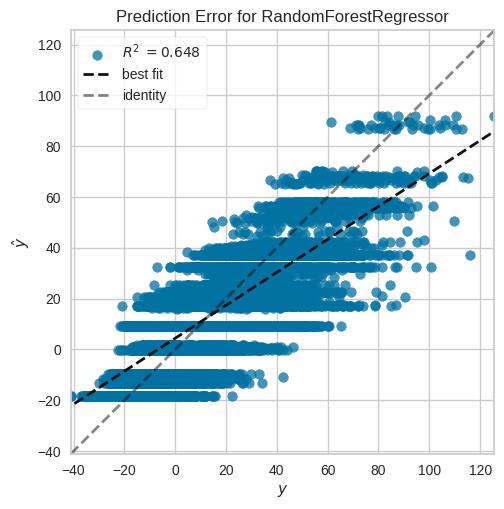

In [36]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(modelo, X_train, y_train, X_test, y_test);

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


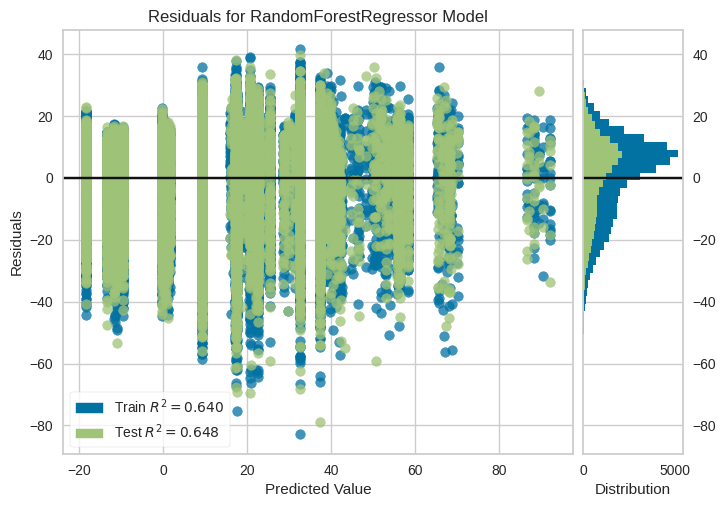

In [39]:
from yellowbrick.regressor import residuals_plot

visualizer = residuals_plot(modelo, X_train, y_train, X_test, y_test);

In [41]:
from sklearn.model_selection import KFold, cross_validate

scoring= {
    'RMSE':'neg_root_mean_squared_error',
    'MAE':'neg_mean_absolute_error',
    'R2': 'r2'
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(modelo, X_train, y_train, scoring=scoring, cv=cv)
cv_results

{'fit_time': array([3.84811616, 3.43952537, 4.38150215, 3.42458677, 3.64546824]),
 'score_time': array([0.05696201, 0.09207249, 0.07396221, 0.05538368, 0.05705261]),
 'test_RMSE': array([-13.76989748, -13.86928373, -13.96807668, -13.85347402,
        -13.98953528]),
 'test_MAE': array([-11.03252135, -11.13534968, -11.2094657 , -11.14503717,
        -11.25775565]),
 'test_R2': array([0.64559466, 0.63745663, 0.63523823, 0.64089302, 0.63441267])}

## Feature Importances

In [43]:
len(df.columns)

31

In [47]:
importances = modelo.feature_importances_

In [57]:
feature_importances = pd.DataFrame({'Features':X.columns, 'Importances':(importances*100).round(2)}).sort_values('Importances', ascending=False)
feature_importances

,Features,Importances
4,airline_BZ,53.03
2,is_holiday,14.59
7,aircraft_type_Airbus A320,10.07
8,aircraft_type_Airbus A330,5.76
12,aircraft_type_Embraer E175,4.59
1,arrival_time,3.60
11,aircraft_type_Boeing 787,2.64
20,origin_TCY,2.09
15,origin_CSF,1.60
19,origin_PUA,1.03


In [49]:
resultados = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])
model_features = RandomForestRegressor(max_depth=5, random_state=42)
ct_features = [i if i != 0 else 1 for i in range(0,35,5)]

for i in ct_features:
  selected_features = feature_importances['Features'].values[:i]
  X_train_sel = X_train[selected_features]
  X_test_sel = X_test[selected_features]
  model_features.fit(X_train_sel, y_train)
  y_pred = model_features.predict(X_test_sel)
  metrics = calcular_regresion(y_test, y_pred)
  resultados[i] = list(metrics.values())

resultados

,1,5,10,15,20,25,30
RMSE,18.8331,15.1564,13.7587,13.7497,13.7498,13.7477,13.7479
MAE,14.9600,12.0600,11.0400,11.0300,11.0300,11.0300,11.0300
R2,0.3400,0.5700,0.6500,0.6500,0.6500,0.6500,0.6500


In [50]:
resultados = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])
model_features = RandomForestRegressor(max_depth=5, random_state=42)
ct_features = range(10,16)

for i in ct_features:
  selected_features = feature_importances['Features'].values[:i]
  X_train_sel = X_train[selected_features]
  X_test_sel = X_test[selected_features]
  model_features.fit(X_train_sel, y_train)
  y_pred = model_features.predict(X_test_sel)
  metrics = calcular_regresion(y_test, y_pred)
  resultados[i] = list(metrics.values())

resultados

,10,11,12,13,14,15
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497
MAE,11.0400,11.0400,11.0300,11.0300,11.0300,11.0300
R2,0.6500,0.6500,0.6500,0.6500,0.6500,0.6500


In [53]:
selected_features = feature_importances['Features'].values[:14]
X_selected_features = X[selected_features]
X_selected_features.columns.to_list()

['airline_BZ',
 'is_holiday',
 'aircraft_type_Airbus A320',
 'aircraft_type_Airbus A330',
 'aircraft_type_Embraer E175',
 'arrival_time',
 'aircraft_type_Boeing 787',
 'origin_TCY',
 'origin_CSF',
 'origin_PUA',
 'origin_TZF',
 'day_name_Friday',
 'origin_MWL',
 'aircraft_type_Boeing 737']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_features,y,random_state=42)

In [58]:
param_grid = {
    'max_depth':[5,10,15],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[2,4,6],
    'n_estimators':[100,150,200]
}

In [62]:
from sklearn.model_selection import GridSearchCV

cv = KFold(n_splits=5, shuffle=True, random_state=42)
model_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=cv
)
model_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [64]:
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [65]:
y_pred_grid = model_grid.predict(X_test)
metricas_model_grid = calcular_regresion(y_test, y_pred_grid)
metricas_model_grid

{'RMSE': 13.2308, 'MAE': 10.63, 'R2': 0.68}

In [66]:
resultados['model_grid'] = list(metricas_model_grid.values())
resultados

,10,11,12,13,14,15,model_grid
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497,13.2308
MAE,11.0400,11.0400,11.0300,11.0300,11.0300,11.0300,10.6300
R2,0.6500,0.6500,0.6500,0.6500,0.6500,0.6500,0.6800


In [68]:
import pickle

try:
  with open('champion.pkl', 'wb') as file:
    pickle.dump(model_grid.best_estimator_,file)
  print(f'Modelo serializado con éxito')
except Exception as e:
  print('Se presento un error al almacenar el modelo', str(e))

Modelo serializado con éxito


In [72]:
nueva_muestra = [0.0, 10.8941, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0,0.0, 0.0, 0.0, 0.0]

In [70]:
file_path = '/content/champion.pkl'

try:
    with open(file_path, 'rb') as file:
        model = pickle.load(file)
    print("¡Modelo cargado con éxito!")
except Exception as e:
    print("Ocurrió un error al cargar el modelo:", str(e))

¡Modelo cargado con éxito!


In [73]:
model.predict([nueva_muestra])[0]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(48.72895275024509)